In [1]:
%matplotlib inline


# Recursive feature elimination


A recursive feature elimination example showing the relevance of pixels in
a digit classification task.

<div class="alert alert-info"><h4>Note</h4><p>See also `sphx_glr_auto_examples_feature_selection_plot_rfe_with_cross_validation.py`</p></div>




https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

Automatically created module for IPython interactive environment


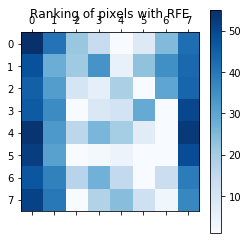

In [2]:
print(__doc__)

from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 432x288 with 0 Axes>

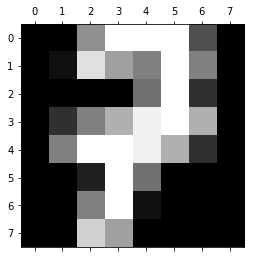

7


In [5]:
plt.gray()
plt.matshow(digits.images[44]) 
plt.show()
print(digits.target[44])

In [6]:
X.shape

(1797, 64)

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
ranking

array([[55, 41, 22, 14,  1,  8, 25, 42],
       [48, 28, 21, 34,  5, 23, 35, 43],
       [45, 32, 10,  6, 19,  1, 30, 44],
       [46, 36,  1,  9, 11, 29,  1, 50],
       [54, 33, 16, 26, 20,  7,  1, 53],
       [52, 31,  1,  2,  4,  1,  1, 49],
       [47, 38, 17, 27, 15,  1, 13, 39],
       [51, 40,  1, 18, 24, 12,  3, 37]])

In [9]:
import numpy as np
print(np.min(ranking))
print(np.max(ranking))
print(np.mean(ranking))

1
55
24.203125


In [10]:
print(rfe.support_.shape)
rfe.support_

(64,)


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False])

In [11]:
rfe.get_support().reshape(digits.images[0].shape)

array([[False, False, False, False,  True, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False,  True, False, False],
       [False, False,  True, False, False, False,  True, False],
       [False, False, False, False, False, False,  True, False],
       [False, False,  True, False, False,  True,  True, False],
       [False, False, False, False, False,  True, False, False],
       [False, False,  True, False, False, False, False, False]])

In [12]:
nb_selected = 0
for s in rfe.get_support():
    if(s == True):
        nb_selected += 1
nb_selected

10

In [13]:
selected = rfe.fit_transform(X, y)

In [14]:
selected.shape

(1797, 10)

In [15]:
selected[0]

array([ 9., 11., 12.,  8.,  8., 11., 12.,  7., 12.,  6.])

In [20]:
X.shape

(1797, 64)

In [21]:
digits.images.shape

(1797, 8, 8)

In [31]:
selected_indices = rfe.get_support(indices=True)
selected_indices

array([ 4, 21, 26, 30, 38, 42, 45, 46, 53, 58])

In [36]:
selected_pixels_by_img = np.zeros((X.shape[0], selected_indices.shape[0]))
print(selected_pixels_by_img.shape)
for i in np.arange(selected_pixels_by_img.shape[0]):
  selected_pixels_by_img[i, :] = X[i, selected_indices]

(1797, 10)


In [37]:
selected_pixels_by_img[0]

array([ 9., 11., 12.,  8.,  8., 11., 12.,  7., 12.,  6.])